# Basic Statistics
This notebook contains basic statistics regarding the datasets.

## Import the libraries

In [1]:
import csv
import math
import urllib2
import json
import re
import os
import calendar
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from datetime import datetime
from collections import Counter, defaultdict
from __future__  import division
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial

## IMDb Ranking

### Get the data

In [2]:
# get the imdb scores
with open("imdb-score-mod-mod.json") as data_file:    
    IMDB_ratings = json.load(data_file)

### Calculate the imdb rating distribution

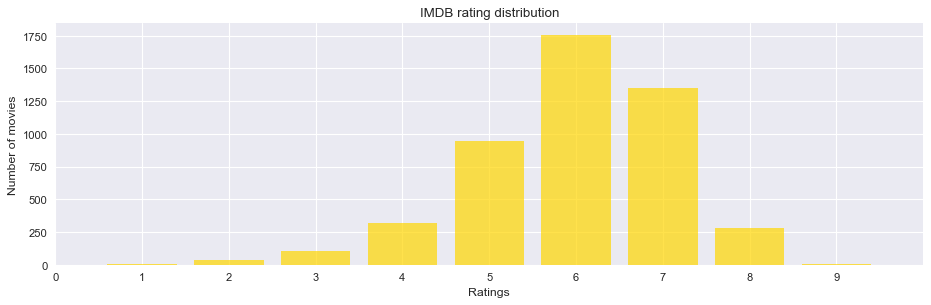

The mean of the distribution is: 6.4216802168
The median of the distribution is: 6.5
The variance of the distribution is: 1.23367630966


In [3]:
# 10 bins ourselves, where each bin is [0-1>, [1-2>...
ratings = []
ratings_for_stats = []
for key in IMDB_ratings:
    # floor the data point so we can use counter to count how many time´s the value is in the correct bin
    ratings.append(math.floor(float(IMDB_ratings[key])))
    ratings_for_stats.append(float(IMDB_ratings[key]))


hist_values = Counter(ratings) 
xlabel = []
ylabel = []

for key, value in sorted(hist_values.items()):
    xlabel.append(key)
    ylabel.append(value)
    



plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xlabel, ylabel, color = 'gold', alpha = 0.7)
plt.xlabel('Ratings')
plt.ylabel('Number of movies')
plt.title('IMDB rating distribution')
plt.xlim(0,10)
plt.xticks(range(10), range(10))
plt.show()

# find some intresting statistics of the distribution

print 'The mean of the distribution is: {}'.format(np.mean(ratings_for_stats))
print 'The median of the distribution is: {}'.format(np.median(ratings_for_stats))
print 'The variance of the distribution is: {}'.format(np.var(ratings_for_stats))

Looking at the results we see that most movies have a rating around 6. We see that the mean of the distribution is 6.4 and the median is 6.5. This tells us that if you have a film which has a rating 5, it is probably not so good, since the range of the scale is from 0-10 the naive guess would be that the mean and median values where around 5. However, the values are clusterd around 6.

## The Kaggle dataset, TMDb

## Get data
The dataset is obtained from [here](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

In [4]:
# Get data line by line from tmdb-5000-movie-database and save the data as dictionary
filepath = r"tmdb_5000_credits.csv"
tmdb_5000_credits = defaultdict(dict)

with open(filepath) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for row in reader:
        tmdb_5000_credits[row["title"]] = row
        # put the lists and dictonaries to a correct format, (that is not as string)
        tmdb_5000_credits[row["title"]]['cast'] = json.loads(tmdb_5000_credits[row["title"]]['cast'])
        tmdb_5000_credits[row["title"]]['crew'] = json.loads(tmdb_5000_credits[row["title"]]['crew'])
    
for title in sorted(tmdb_5000_credits.keys()):
    title = title.replace(" ","-").replace("(","").replace(")","")

In [5]:
# Get data line by line from tmdb-5000-movie-database and save the data as dictionary

filepath = r"tmdb_5000_movies.csv"
tmdb_5000_movies = defaultdict(dict)

with open(filepath) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",")
    for row in reader:
        tmdb_5000_movies[row["title"]] = row
        # put the lists and dictonaries to a correct format, (that is not as string)
        tmdb_5000_movies[row["title"]]['genres'] = json.loads(tmdb_5000_movies[row["title"]]['genres'])
        tmdb_5000_movies[row["title"]]['keywords'] = json.loads(tmdb_5000_movies[row["title"]]['keywords'])
        tmdb_5000_movies[row["title"]]['production_companies'] = json.loads(tmdb_5000_movies[row["title"]]['production_companies'])
        
for title in sorted(tmdb_5000_movies.keys()):
    title = title.replace(" ","-").replace("(","").replace(")","")

###  The correlation between the average rating and the budget of the movies

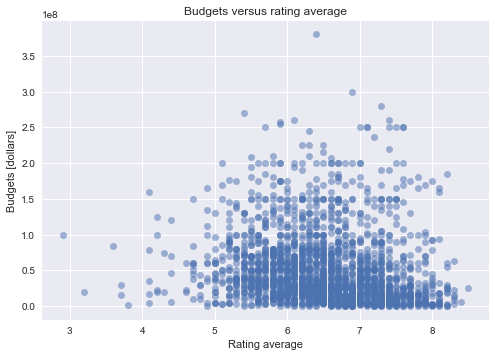

The correlation between average rating and the budget is: 
[[ 1.         -0.13561858]
 [-0.13561858  1.        ]]


In [16]:
vote_average_budget = [] # tuples of vote_averages and budget for each movie
for title in tmdb_5000_movies.keys():
    # we treat movie´s with less than 300 vote count as noise
    if float(tmdb_5000_movies[title]['vote_count'])  > 300:
        budget = float(tmdb_5000_movies[title]['budget'])
        vote_average = float(tmdb_5000_movies[title]['vote_average'])
        vote_average_budget.append((vote_average, budget))
    

vote_averages = []
budgets = []

# sort by rating since that is going to be our x-axis
for values in sorted(vote_average_budget):
    # if a movie has no budget, we treat it as noise
    if values[1] > 0:
        vote_averages.append(values[0])
        budgets.append(values[1])
    

# Lets plot the data
plt.plot(vote_averages, budgets, 'o', alpha = 0.5)
plt.title('Budgets versus rating average')
plt.xlabel('Rating average')
plt.ylabel('Budgets [dollars]')
plt.show()

# find the correlation:
print "The correlation between average rating and the budget is: "
print np.corrcoef(vote_averages, budgets)

Looking at the results, we can see that there is no correlation between vote average and budget. This tells us that spending more money on a movie doesn't necessarily give you a better rating. So we would advise movie producers to think about what the dollars are going into.

### The correlation between the popularity of a movie and it's release month

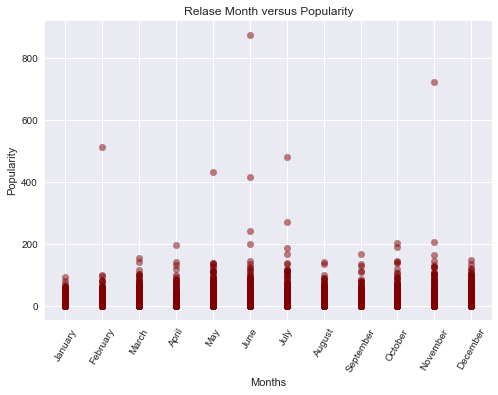

The correlation between month of release and the popularity is: 
[[ 1.          0.04678127]
 [ 0.04678127  1.        ]]


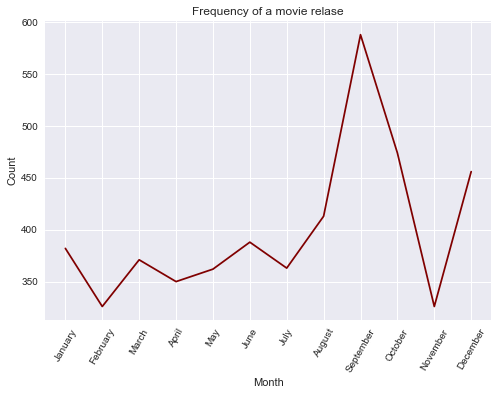

In [18]:
poopularity_date = [] # tuples of dates and popluarities in seconds for each movie
for title in tmdb_5000_movies.keys():
    popularity = float(tmdb_5000_movies[title]['popularity'])
    date = tmdb_5000_movies[title]['release_date'].split('-')
    # ensure we have a date and popularity for the film
    if len(date) > 1 and popularity > 0:
        month = int(date[1])
        poopularity_date.append((month, popularity))
    
months = []
popularities = []

# sort by date since that is going to be our x-axis
for values in sorted(poopularity_date):
    # collect the data for plotting
    months.append(values[0])
    popularities.append(values[1])


# Lets plot the data..
plt.plot(months, popularities, 'o', alpha = 0.5, color = 'maroon')
plt.title('Relase Month versus Popularity')
plt.xlabel('Months')
plt.ylabel('Popularity')
plt.xticks( range(1, 13), calendar.month_name[1:13], rotation=60 )
plt.show()

# find the correlation:
print "The correlation between month of release and the popularity is: "
print np.corrcoef(months, popularities)

# count the number of times a movie is relased in each month
months_count = Counter(months)
plt.plot(months_count.keys(), months_count.values(), color = 'maroon')
plt.title('Frequency of a movie relase')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks( range(1, 13), calendar.month_name[1:13], rotation=60 )
plt.show()

Looking at the results, we can see that there is no correlation between popularity and month of release. We can also see that most movies come out in September, however it doesn't look like they receive a lot of popularity on average. However, in June there is not as many new movies coming out, but some of them are very popular. These results are quite interesting, and makes you wonder if it is better to release a movie when few other movies are released. The second plot seems to support that. However, these could of course just be very good movies which would gain similar attraction regardless of what month they were released.

### The correlation between revenue and budget

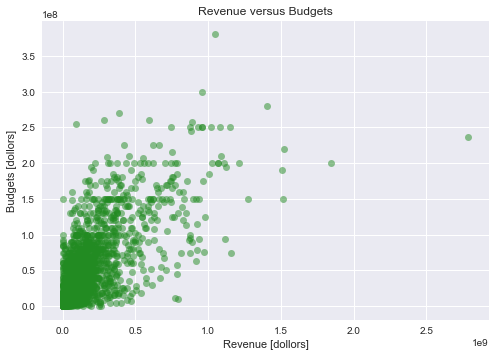

The correlation between revenue and the budget is: 
[[ 1.          0.67994011]
 [ 0.67994011  1.        ]]


In [20]:
revenue_budget = [] # tuples of vote_averages and budget for each movie
for title in tmdb_5000_movies.keys():
    # we treat movie´s with less than 300 vote count as noise
    if float(tmdb_5000_movies[title]['vote_count'])  > 300:
        budget = float(tmdb_5000_movies[title]['budget'])
        revenue = float(tmdb_5000_movies[title]['revenue'])
        revenue_budget.append((revenue, budget))
    

revenues = []
budgets = []

# sort by rating since that is going to be our x-axis
for values in sorted(revenue_budget):
    # if a movie has no budget, we treat it as noise
    if values[1] > 0:
        revenues.append(values[0])
        budgets.append(values[1])
    


# Lets plot the data
plt.plot(revenues, budgets, 'o', alpha = 0.5, color = 'forestgreen')
plt.title('Revenue versus Budgets')
plt.xlabel('Revenue [dollors]')
plt.ylabel('Budgets [dollors]')
plt.show()

# find the correlation:
print "The correlation between revenue and the budget is: "
print np.corrcoef(revenues, budgets)
    

Here we have some correlation. The more money spent on a film, the more revenue will it generate. This somewhat makes sense because the films that have higher budgets are usually those who are well connected, which could result in the movies being more widely distributed. In addition to that the budgets also contain the money spent on marketing so a bigger budget should relate to more money being spent of publicity. However, this does not need to be the case for all these movies, and ofcourse here it applies that correlation does not imply causation. If you just spend a lot of moeny and don't do anything clever with it, you aren't likely to succeed.

### Revenue compared to a movie cast's gender ratio

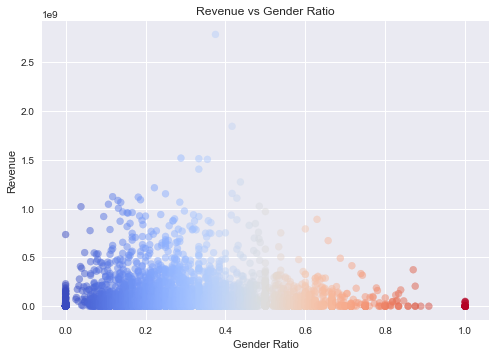

Gender Ratio: The closer to the value 1, the bigger ratio of females
Gender Ratio: The closer to the value 0, the bigger ratio of males
The correlation between revenue and the gender ratio is: 
[[ 1.         -0.08249627]
 [-0.08249627  1.        ]]


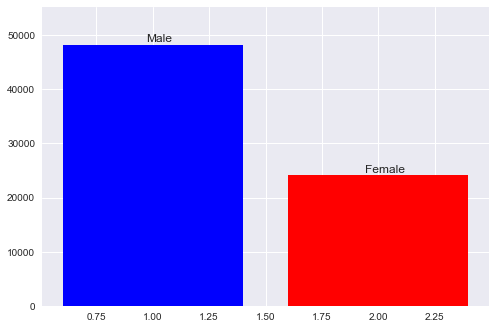


Number of actors

Number of females: 24158
Number of males: 48264
Total number of actors: 72422


In [9]:
total_number_off_females = 0
total_number_off_males = 0
revenue_gender_ratio = [] # tuples of revenue and gender ratio
for title in tmdb_5000_credits.keys():
    number_of_males = 0
    number_of_females = 0
    for actor in tmdb_5000_credits[title]['cast']:
        # count how many females and males are in each movie
        gender_type = actor['gender']
        if gender_type == 1:
            number_of_females += 1
        elif gender_type == 2:
             number_of_males+= 1
        else:
            # if a person has no gender or gender is not specified we tread it as noise 
            pass
    total_number_off_females += number_of_females
    total_number_off_males += number_of_males
            
            
    # if both number of males and females is 0, we treat the data as noise, since we need to have actors  
    try: 
        revenue_gender_ratio.append(( number_of_females / (number_of_males + number_of_females), float(tmdb_5000_movies[title]['revenue'])))
        
    except  ZeroDivisionError:
        pass
    
    

gender_ratio = []
revenue = []

# sort the gender since it is going to be our x axis
for values in sorted(revenue_gender_ratio):
    gender_ratio.append(values[0])
    revenue.append(values[1])
    
# for color of the plots
t = range(len(gender_ratio))

plt.scatter(gender_ratio, revenue, c=gender_ratio, cmap='coolwarm', alpha = 0.5)
plt.title('Revenue vs Gender Ratio')
plt.xlabel('Gender Ratio')
plt.ylabel('Revenue')
plt.show()


print "Gender Ratio: The closer to the value 1, the bigger ratio of females"
print "Gender Ratio: The closer to the value 0, the bigger ratio of males"
# find the correlation:
print "The correlation between revenue and the gender ratio is: "
print np.corrcoef(gender_ratio, revenue)


plt.bar([1,2], [total_number_off_males, total_number_off_females], color = ['blue', 'red'])
plt.ylim([0, max(total_number_off_females, total_number_off_males) + 7000])
plt.text(1.94,total_number_off_females + 500, 'Female')
plt.text(0.97,total_number_off_males + 500, 'Male')
plt.show()


print
print '\033[1m' + 'Number of actors' # this is bold
print '\033[0m' # stops the boldness
print 'Number of females: {}'.format(total_number_off_females)
print 'Number of males: {}'.format(total_number_off_males)
print 'Total number of actors: {}'.format(total_number_off_males + total_number_off_females)


By looking at the first figure, we see that there is not a correlation between the ratio of gender and the revenue of the movie. Altough the plot seems to favor having more males than females in the movie. However, we can see thata there is a huge class imbalance here, with almost two times more males than females. This is a problem that the film industry needs to adress. However, in our analysis there can not be found a correlation between gender and ratio, pointing to the fact that the problem is elsewhere.

### Correlation between multiple variables
In this section we will investigate the correlation between different variables in our kaggle dataset. To make the analysis a little bit more interesting we added the information about the IMDb rating of each movie. There are some movies that either are missing some values in the kaggle database or they do not have a IMDb rating. We excluded those movies, 3 in total out of 4800 movies. We visualize the findings in a heatmap which shows the correlation coefficients between each pair of variables.

In [21]:
# We use the fact that we know that each movie has a name, so we do not include any error handling
def findMovieNameFromId(id):
    name = [key for key, info in tmdb_5000_movies.items() if info['id'] == id]
    return name[0]

In [22]:
IMDB_5000_movies = defaultdict(float)

# change the dictionary key from id to name of the movie
for key,value in IMDB_ratings.items():
    try: 
        name = findMovieNameFromId(key)
        IMDB_5000_movies[name] = float(value)
    except Exception as e: 
        print("The movie {} has been removed from kaggle database".format(key))


In [23]:
# Get data for each movie 

correlation_data = {
    "1 tmdb_rating" :[],
    "2 imdb_rating" : [],
    "3 popularity" : [],
    "4 budget" : [],
    "5 revenue" : [],
    "6 duration" : [],
    "7 title_year": [],
    "8 id" : [],
    "9 nr_of_actors": []
}
i = 0
# There are three movies in the database that do not have any imdb ratings, therefore we excluded 
# those movies from the analysis
for movie, imdb_rating in [(key,value) for key,value in IMDB_5000_movies.items() if value != 0 ]:
    
    # There are some movies that either did not have imdb rating or had some information missing from the kaggle database.
    # We handle these cases just by ignoring them. That is the reason for the try and catch loop 
    try:
        
        
        tmdb_rating = float(tmdb_5000_movies[movie]['vote_average'])
        imdb_rating = float(imdb_rating)
        popularity = float(tmdb_5000_movies[movie]['popularity'])
        budget = float(tmdb_5000_movies[movie]["budget"])
        revenue = float(tmdb_5000_movies[movie]['revenue'])
        duration = float(tmdb_5000_movies[movie]['runtime'])
        title_year = float(tmdb_5000_movies[movie]["release_date"].split("-")[0])
        movie_id = float(tmdb_5000_movies[movie]['id'])
        nr_of_actors = float(len(tmdb_5000_credits[movie]['cast']))
        
        correlation_data["1 tmdb_rating"].append(tmdb_rating)
        correlation_data["2 imdb_rating"].append(imdb_rating)
        correlation_data["3 popularity"].append(popularity)
        correlation_data["4 budget"].append(budget)
        correlation_data["5 revenue"].append(revenue)
        correlation_data["6 duration"].append(duration)
        correlation_data["7 title_year"].append(title_year)
        correlation_data["8 id"].append(movie_id)
        correlation_data["9 nr_of_actors"].append(nr_of_actors)
        
    except: 
        print("The movie '{}' is missing some values in the database".format(movie))
       

The movie 'America Is Still the Place' is missing some values in the database
The movie 'To Be Frank, Sinatra at 100' is missing some values in the database
The movie 'Chiamatemi Francesco - Il Papa della gente' is missing some values in the database


In [24]:
# Calculate correlation between each variable
# First create 10x10 numpy matrix

corralation_matrix = np.zeros((9,9))

for i,key1 in enumerate(sorted(correlation_data.keys())):
    for j,key2 in enumerate(sorted(correlation_data.keys())):
        corralation_matrix[i][j] = np.corrcoef(correlation_data[key1],correlation_data[key2])[1][0]

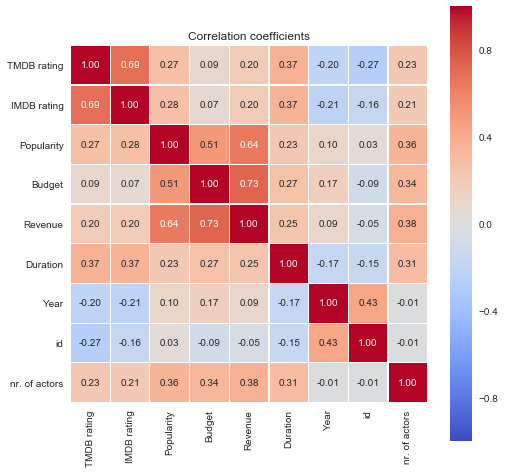

In [25]:
plt.figure(figsize=(8,8))

labels = ["TMDB rating",
         "IMDB rating",
         "Popularity",
         "Budget",
         "Revenue",
         "Duration",
         "Year",
         "id",
         "nr. of actors"]

hm = sns.heatmap(corralation_matrix, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'coolwarm',
                 yticklabels=labels, xticklabels=labels)
plt.title("Correlation coefficients")
plt.show()

#### Some thoughts:
- The correlation between the TMDb rating and the IMDb rating is interesting, there seems to be less positive correlation between these values than one would expect. This is most likely do to the fact that the TMDb rating is based on much less data, fewer votes on average, than the IMDb rating. Based on these informations we decided to only use the IMDb ratings in further analysis of the dataset.

- Budget and revenue is highly positive correlated which means that if a movie has a high budget then the movie is more likely to get higher revenue in the end. Like everyone knows, you need to spend money to make money.

- Popularity is also quite correlated with revenue which is something that one could expect. However you would expect the correlation to be higher than 0.64.

- Duration is also sligthly positive correlated with number of actors. The movie industry gets bigger and bigger each year and therefore the size of the cast of the "newer movies" is bigger than for the "older movies". Here it needs to be taken into account that we have much fewer movies that can be considered to be old in our database. Therefore the correlation is not as much as you would expect but still there is some positive correlation between these variables.

### Histogram of ratings

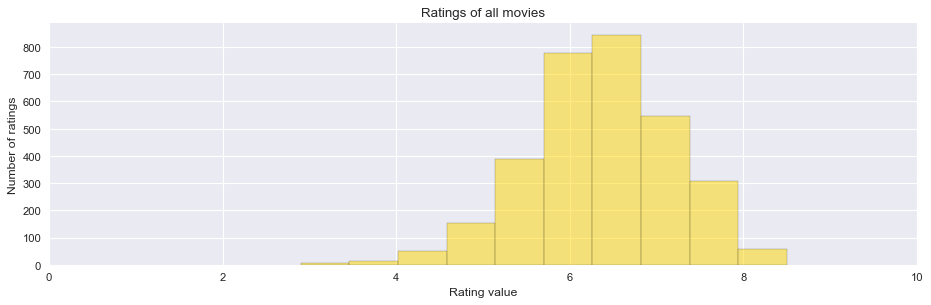

The mean value of the ratings is: 6.35600381194
The variance of the ratings is: 0.695964589566
The max value of the ratings is: 8.5
The min value of the ratings is: 2.9


In [26]:
ratings = []
for title in tmdb_5000_movies.keys():
    # we do not accept vote average for fewer than 100 votes
    if float(tmdb_5000_movies[title]["vote_count"]) > 100:
        ratings.append(float(tmdb_5000_movies[title]["vote_average"]))

plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k') 
plt.hist(ratings, color = 'gold', alpha = 0.5, histtype='bar', ec='black')
plt.xlabel('Rating value')
plt.ylabel('Number of ratings')
plt.title('Ratings of all movies')
# show all the posibilities
plt.xlim([0,10])
plt.show()
print 'The mean value of the ratings is: {}'.format(np.mean(ratings))
print 'The variance of the ratings is: {}'.format(np.var(ratings))
print 'The max value of the ratings is: {}'.format(max(ratings))
print 'The min value of the ratings is: {}'.format(min(ratings))

We can see that the ratings fluctuate between 2.9 and 8.5 in the ratings. The mean is 6.35, which is relativly high we would've consider that a movie rated at 5 is a 'okay' film but 5 turns out to be quite bad. We can also see that there are few films with very good ratings. There are also few films with low rating, most of them group around the mean value.

### Count genre

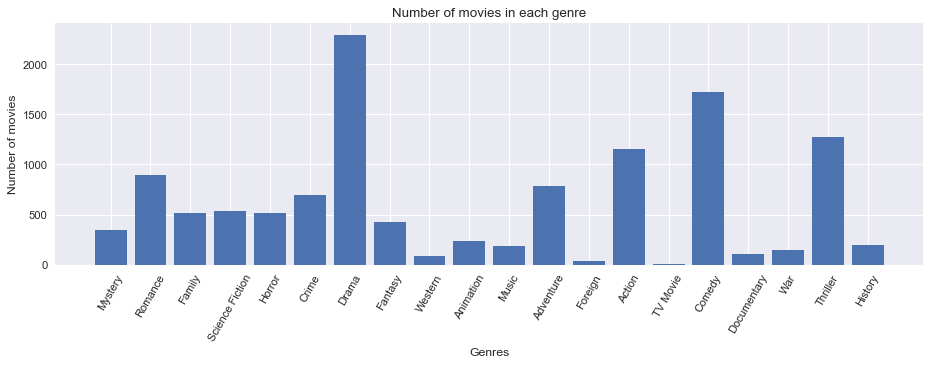

In [27]:
genres = []
for title in tmdb_5000_movies.keys():
    for names in tmdb_5000_movies[title]['genres']:
        # append all values for genre to the genres list
        genres.append(names['name'])
        
# get the count of all genres
number_in_genres = Counter(genres)


# get the data to plot
unique_genres = []
count = []
for key, value in number_in_genres.items():
    count.append(value)
    unique_genres.append(key)
    
plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')    
plt.bar(range(len(count)), count)
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.title('Number of movies in each genre')
plt.xticks( range(len(unique_genres)), unique_genres, rotation=60 )

plt.show()

### Revenue in each genre

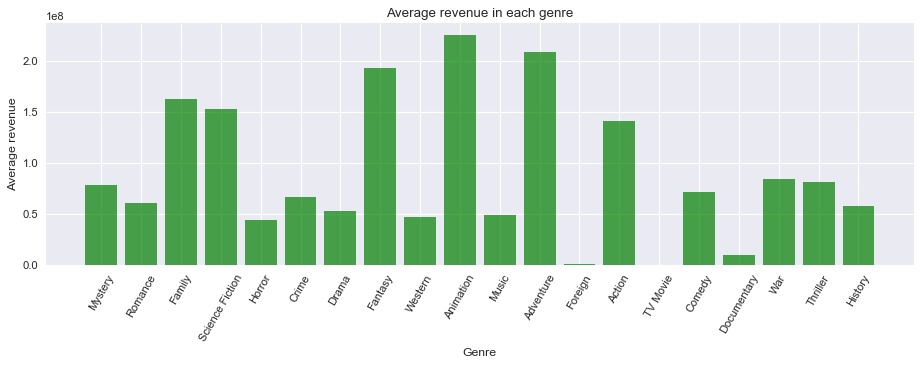

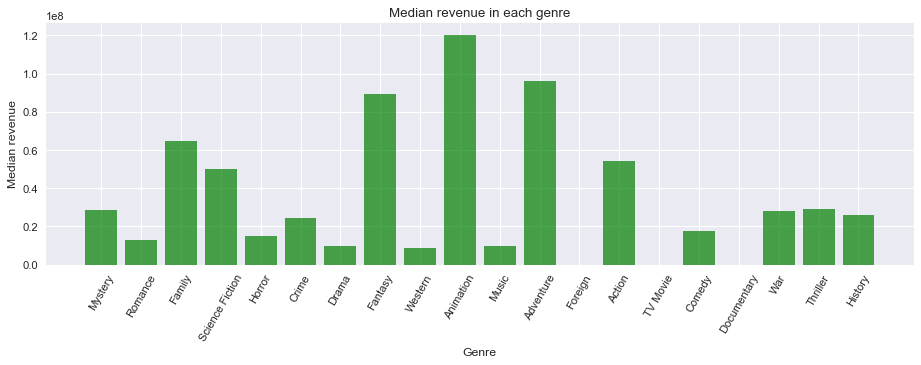

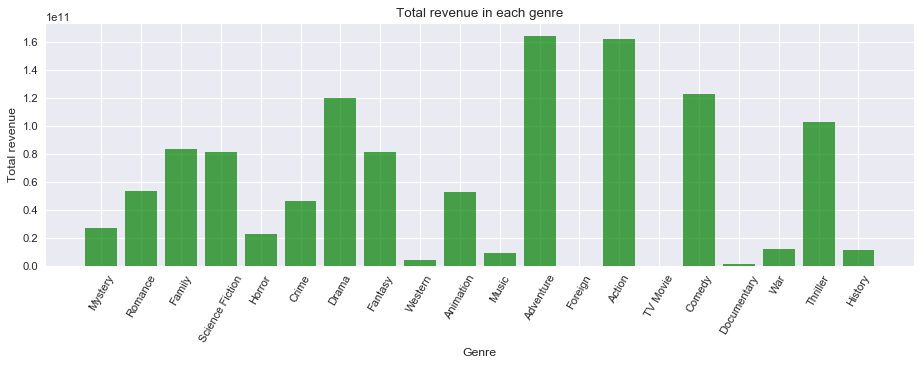

In [28]:
genres_revenue = {}
for title in tmdb_5000_movies.keys():
        
    revenue = float(tmdb_5000_movies[title]['revenue'])
    
    for genre in tmdb_5000_movies[title]['genres']:
        # append all values for genre to the genres list
        
        if genre['name'] in genres_revenue:
            genres_revenue[genre['name']].append(revenue)
        else:
            genres_revenue[genre['name']] = [revenue]
            

genre_names = []
y_average = []
y_median = []
y_sum = []
for key, val in genres_revenue.items():
    genre_names.append(key)
    y_average.append(np.mean(val))
    y_median.append(np.median(val))
    y_sum.append(sum(val))
    
xlabel = range(len(genre_names))

plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xlabel, y_average, color = 'green', alpha = 0.7)
plt.xlabel('Genre')
plt.ylabel('Average revenue')
plt.title('Average revenue in each genre')
plt.xticks(xlabel, genre_names, rotation=60)
plt.show()


plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xlabel, y_median, color = 'green', alpha = 0.7)
plt.xlabel('Genre')
plt.ylabel('Median revenue')
plt.title('Median revenue in each genre')
plt.xticks(xlabel, genre_names, rotation=60)
plt.show()


plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xlabel, y_sum, color = 'green', alpha = 0.7)
plt.xlabel('Genre')
plt.ylabel('Total revenue')
plt.title('Total revenue in each genre')
plt.xticks(xlabel, genre_names, rotation=60)
plt.show()
            
        
        

Here we have a class imbalance, we see that we have many films in some of the genres, but few films in other genres. We can see that the difference between number of movies that are considered 'TV Movies' and those who are considered 'Drama' is huge. Some readers might notice that the sum of all the movies in all genres is a much higer value than the number of movies in the dataset. The reason being that movies can have more than one genre. We can therefore see that quite many of the movies have more than one genre assigned to them.

### Average IMDb rating of each genre
In this dataset we use both data from the Kaggle dataset (TMDb) and the scraped ratings from IMDb. 

movie: Æon Flux, dose not have IMDb rating
movie: xXx: State of the Union, dose not have IMDb rating
movie: xXx, dose not have IMDb rating


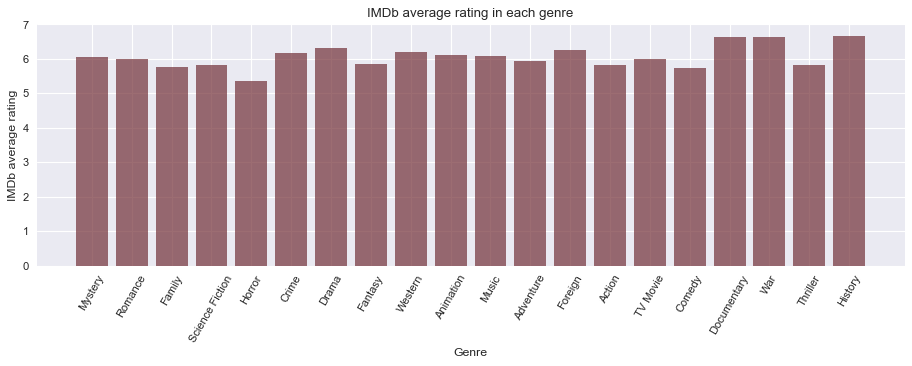

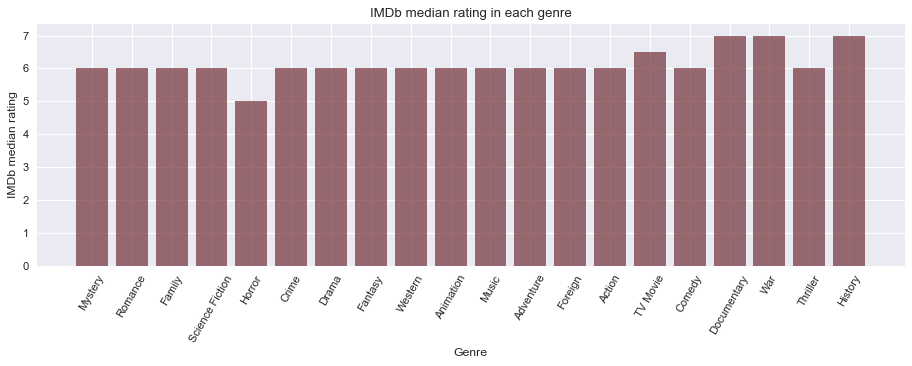

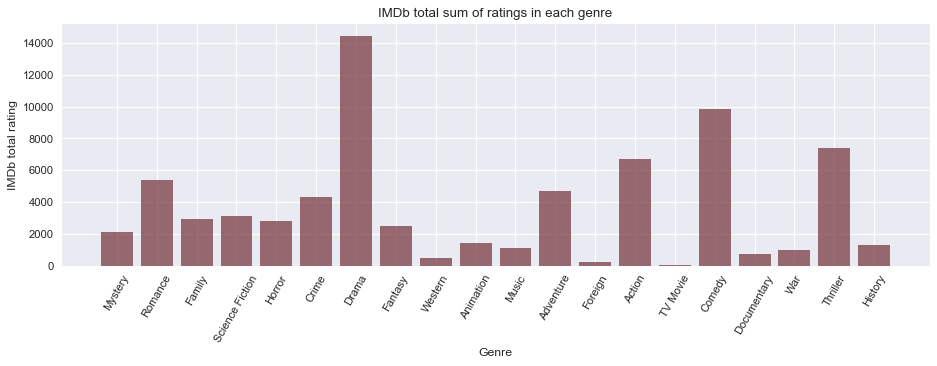

In [30]:
genres_rating = {}
for title in tmdb_5000_movies.keys():
    key = tmdb_5000_movies[title]['id']
    try:
        rating = math.floor(float(IMDB_ratings[key]))
    except Exception as e:
        print "movie: {}, dose not have IMDb rating".format(title)
    
    
    for genre in tmdb_5000_movies[title]['genres']:
        # append all values for genre to the genres list
        
        if genre['name'] in genres_rating:
            genres_rating[genre['name']].append(rating)
        else:
            genres_rating[genre['name']] = [rating]
            

genre_names = []
y_average = []
y_median = []
y_sum = []
for key, val in genres_rating.items():
    genre_names.append(key)
    y_average.append(np.mean(val))
    y_median.append(np.median(val))
    y_sum.append(sum(val))
    
xlabel = range(len(genre_names))

plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xlabel, y_average, color = '#722f37', alpha = 0.7)
plt.xlabel('Genre')
plt.ylabel('IMDb average rating')
plt.title('IMDb average rating in each genre')
plt.xticks(xlabel, genre_names, rotation=60)
plt.show()


plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xlabel, y_median, color = '#722f37', alpha = 0.7)
plt.xlabel('Genre')
plt.ylabel('IMDb median rating')
plt.title('IMDb median rating in each genre')
plt.xticks(xlabel, genre_names, rotation=60)
plt.show()


plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xlabel, y_sum, color = '#722f37', alpha = 0.7)
plt.xlabel('Genre')
plt.ylabel('IMDb total rating')
plt.title('IMDb total sum of ratings in each genre')
plt.xticks(xlabel, genre_names, rotation=60)
plt.show()
            
        
        

Looking at the figures above, we can see that the ratings of the 'Documentary', 'War' and 'History' movies are the highest on average, and also have the highest median score. We see that there are some movies which draw the mean a little bit upp, for example we see that in 'Drama', where the average is a little bit higher than the median value. In a similar manner there are some movies that draw the mean down, this can be seen by looking at the 'Fantasy' genre, where the mean is lower than the median. Thus there is/are some movie/s in the 'Fantasy' genre which apperantly, suck/s. We however see that the median and the mean value are prettly similar, so the distribution is not that skewed. However, if we look at the total sum of the ratings in each genere, we agian see the effect from a huge class imbalance. This also gives us some idea of the average, where some genres have much fewer values to average over. This of course has some effect on the final result, as each movie has more importance in the generes with fewer movies.

### Production Companies
Plot the number of movies produced for the 10 most common production companies as well as the total number of production companies.

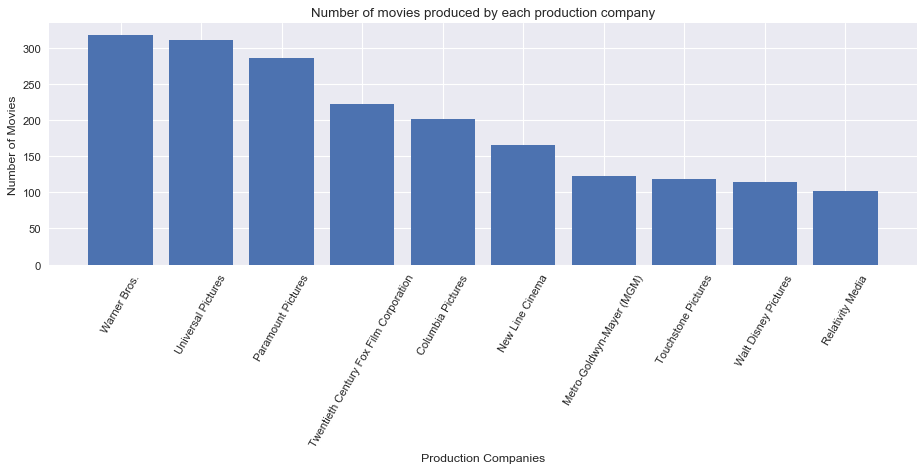

The total number of production companies is: 5016


In [31]:
# find the number of production companies

production_companies = []
for title in tmdb_5000_movies.keys():
    for company in tmdb_5000_movies[title]['production_companies']:
        production_companies.append(company['name'])
        

# count number of all production companies
production_companies_count = Counter(production_companies)

# top 10 most common production companies
most_comon_production_companies = production_companies_count.most_common(10)

# get the data to plot
unique_production_companies = []
count = []
for company_count in most_comon_production_companies:
    count.append(company_count[1])
    unique_production_companies.append(company_count[0])
    
plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')    
plt.bar(range(len(count)), count)
plt.xlabel('Production Companies')
plt.ylabel('Number of Movies')
plt.title('Number of movies produced by each production company')
plt.xticks( range(len(unique_production_companies)), unique_production_companies, rotation=60 )

plt.show()
    
print "The total number of production companies is: {}".format(len(production_companies_count))

From this we see that there are many different production companies. We see that our dataset understandably includes some very big and famous production companies, such as 'Warner Bros.' and 'Universal Pictures'. It is quite strange though that 'Sony Pictures' is not among the top 10 in our data as it is considered to be one of the biggest movie production companies in the world, after some research we found out that 'Sony' owns 'Columbia Pictures' so they are in fact amongst the top 10.

### Number of movies per year

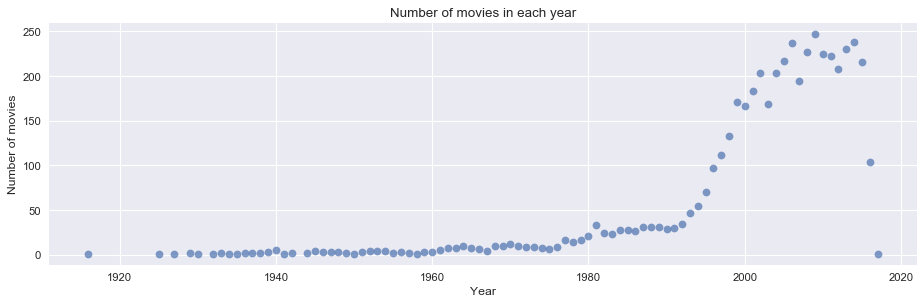

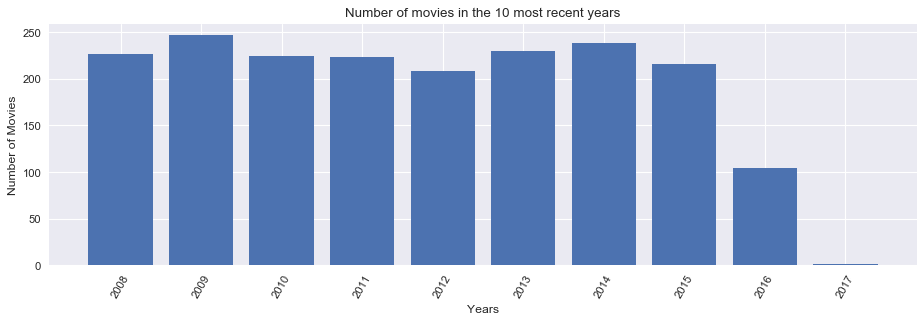

The oldest movie is: 'Intolerance' and it was made 1916


In [34]:
move_year = []
for title in tmdb_5000_movies.keys():
    relase_date =  tmdb_5000_movies[title]['release_date']
    year = relase_date[0:4]
    move_year.append(year)
    # after running once we saw that there is one very old movie
    #letes check what movie that is
    if year == '1916':
        old_movie = title

# get the counts per year of the mmovies
moves_per_year = Counter(move_year)
        
years_in_num = []
years = []
num_movies = []

for val in sorted(moves_per_year.items()):
    # make sure that the tuple contains values
    if val[0] and val[1]:
        # get the string representation of the year
        years.append(val[0])
    
        # get the integer representation of the year
        years_in_num.append(int(val[0]))

        # get the number of movies
        num_movies.append(val[1])


plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(years_in_num, num_movies, 'o', alpha = 0.7)
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies in each year')
plt.show()

plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(years_in_num[len(years_in_num) - 10:], num_movies[len(num_movies) - 10:])
plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.title('Number of movies in the 10 most recent years')
plt.xticks( years_in_num[len(years_in_num) - 10:], years[len(years) - 10:], rotation=60 )
plt.show()

print "The oldest movie is: '{}' and it was made {}".format(old_movie, min(years_in_num))

Looking at how the movies in the dataset are distributed  we see that there are very few movies from 1916 and all the way untill 1990 where the number of movies explodes. This is a nice fact, since it would be better if the recommendation engine (the final product of our project) would rather recommend newer movies than older. It is also very intresting that there is a movie in the dataset which was relased 1916.

### Total revenue per year

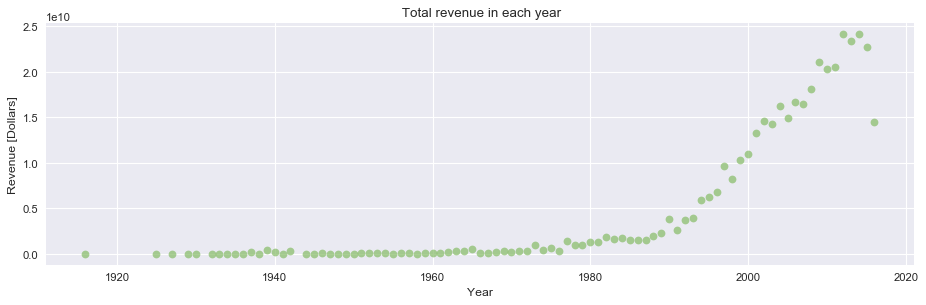

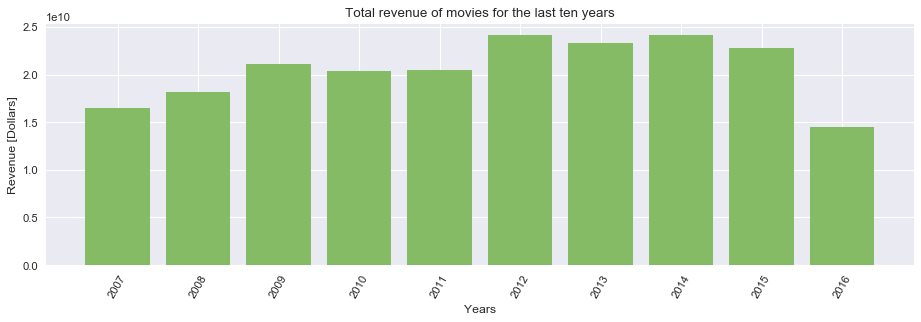

In [36]:
revenue_per_year = {}
for title in tmdb_5000_movies.keys():
    relase_date =  tmdb_5000_movies[title]['release_date']
    year = relase_date[0:4]
    move_year.append(year)
    revenue =  int(tmdb_5000_movies[title]['revenue'])
    if year and revenue:
        # if we have already seen the year, we add to the revenue
        if year in revenue_per_year:
            revenue_per_year[year] = revenue_per_year[year] + revenue
        # if we have not seen the year, we initzalize it
        else:
             revenue_per_year[year] = revenue

years_in_num = []
years = []
revenues = []

for val in sorted(revenue_per_year.items()):
    # make sure that the tuple contains values
    if val[0] and val[1]:
        # get the string representation of the year
        years.append(val[0])
    
        # get the integer representation of the year
        years_in_num.append(float(val[0]))

        # get the number of movies
        revenues.append(val[1])  
        
plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(years_in_num, revenues, 'o', color = '#85bb65',  alpha = 0.7)
plt.xlabel('Year')
plt.ylabel('Revenue [Dollars]')
plt.title(' Total revenue in each year')
plt.show()

plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')

plt.bar(years_in_num[len(years_in_num) - 10:], revenues[len(revenues) - 10:], color = '#85bb65')
plt.xlabel('Years')
plt.ylabel('Revenue [Dollars]')
plt.title('Total revenue of movies for the last ten years')
plt.xticks( years_in_num[len(years_in_num) - 10:], years[len(years) - 10:], rotation=60 )
plt.show()
    

From these plots it appears that the revenue has exploded from 1990, however, this plot is a bit misleading as it's the total revenue each year, and our dataset has many more movies in the years after 1990 than before. Thus this plot gives the wrong picture of the reality. Thus we need to plot the average revenue.

### Average revenue

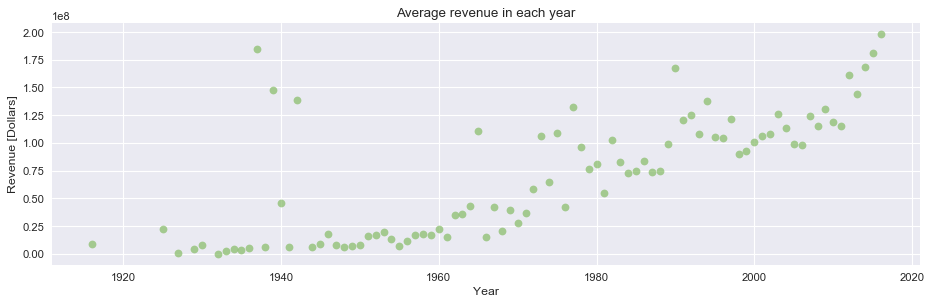

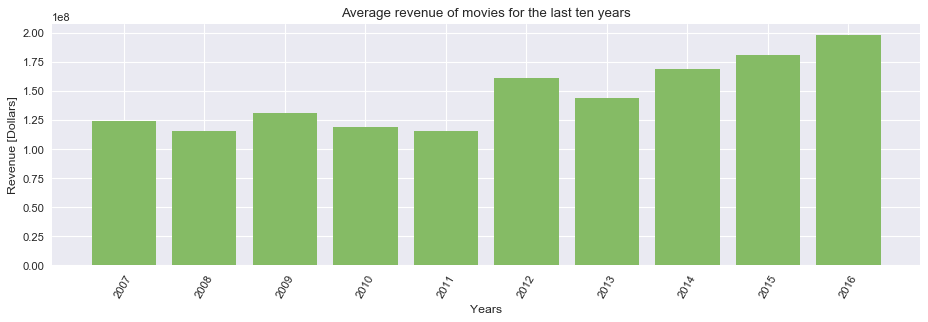

In [38]:
revenue_per_year = {}
for title in tmdb_5000_movies.keys():
    relase_date =  tmdb_5000_movies[title]['release_date']
    year = relase_date[0:4]
    move_year.append(year)
    revenue =  int(tmdb_5000_movies[title]['revenue'])
    if year and revenue:
        # if we have already seen the year, we add to the revenue
        if year in revenue_per_year:
            revenue_per_year[year].append(revenue)
        # if we have not seen the year, we initzalize it
        else:
             revenue_per_year[year] = [revenue]

years_in_num = []
years = []
avg_revenues = []

for val in sorted(revenue_per_year.items()):
    # make sure that the tuple contains values
    if val[0] and val[1]:
        # get the string representation of the year
        years.append(val[0])
    
        # get the integer representation of the year
        years_in_num.append(float(val[0]))

        # get the number of movies
        avg_revenues.append(np.mean(val[1]))  
        
plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(years_in_num, avg_revenues, 'o', color = '#85bb65',  alpha = 0.7)
plt.xlabel('Year')
plt.ylabel('Revenue [Dollars]')
plt.title('Average revenue in each year')
plt.show()

plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')

plt.bar(years_in_num[len(years_in_num) - 10:], avg_revenues[len(avg_revenues) - 10:], color = '#85bb65')
plt.xlabel('Years')
plt.ylabel('Revenue [Dollars]')
plt.title('Average revenue of movies for the last ten years')
plt.xticks( years_in_num[len(years_in_num) - 10:], years[len(years) - 10:], rotation=60 )
plt.show()
    

Now we see that the revenue seems to be increasing in the movie business throughout the years. However, we still have some class imbalance issues altough we have averaged some of it out. The reason is we have so few movies from the most recent years that they might not represent that era well. However, it is commonly known that the movie business has grown a lot, and in the old days there were not as many movies released each year.

### Average score per year

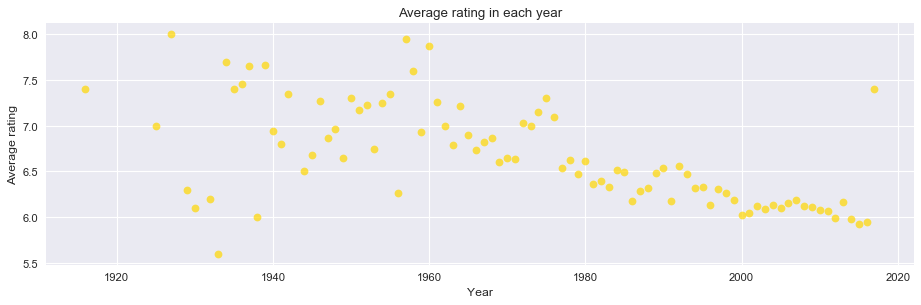

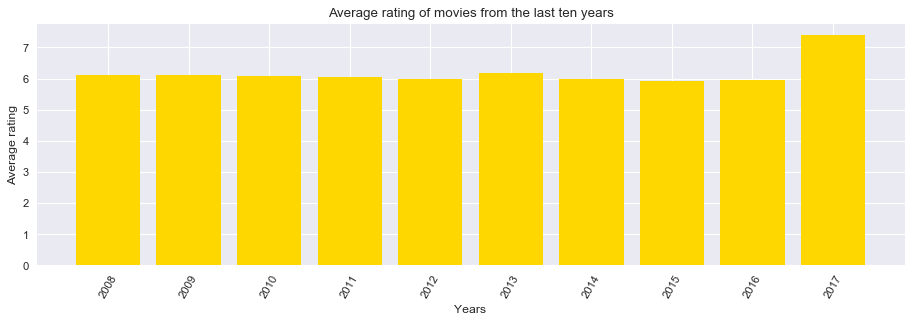

In [39]:
score_per_year = {}

for title in tmdb_5000_movies.keys():
    relase_date =  tmdb_5000_movies[title]['release_date']
    year = relase_date[0:4]
    move_year.append(year)
    score =  float(tmdb_5000_movies[title]['vote_average'])
    if year and score:
        # if we have already seen the year, we add to the revenue
        if year in score_per_year:
            score_per_year[year].append(score)
        # if we have not seen the year, we initzalize it
        else:
             score_per_year[year] = [score]

years_in_num = []
years = []
avg_scores = []

for val in sorted(score_per_year.items()):
    # make sure that the tuple contains values
    if val[0] and val[1]:
        # get the string representation of the year
        years.append(val[0])
    
        # get the integer representation of the year
        years_in_num.append(float(val[0]))

        # get the number of movies
        avg_scores.append(np.mean(val[1]))  
        
plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(years_in_num, avg_scores, 'o', color = 'gold',  alpha = 0.7)
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating in each year')
plt.show()

plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(years_in_num[len(years_in_num) - 10:], avg_scores[len(avg_scores) - 10:], color = 'gold')
plt.xlabel('Years')
plt.ylabel('Average rating')
plt.title('Average rating of movies from the last ten years')
plt.xticks( years_in_num[len(years_in_num) - 10:], years[len(years) - 10:], rotation=60 )
plt.show()
    

Here it seems like the trend is to produce worse and worse movies. However we see that the older movies vary much more, which makes sense as they are much fewer. But combining the results from these plots and the plot above, one could conclude that the trend is to produce movies at a faster rate at the cost of the quality of the movie.

## Cast and crew

## Most common actors

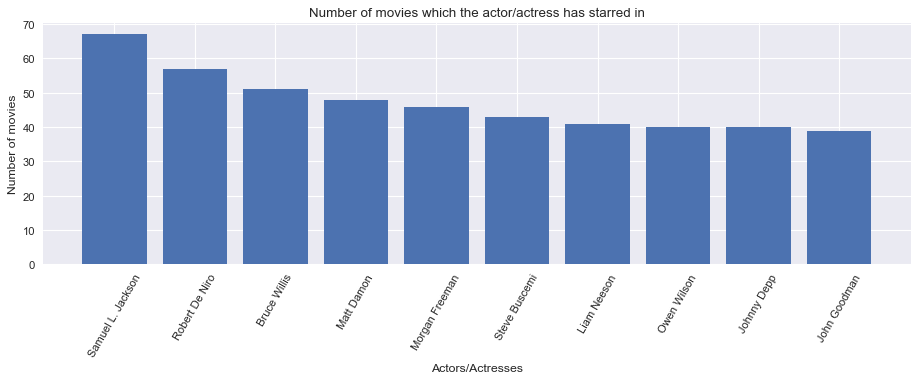

In [42]:
actors = []
for title in tmdb_5000_movies.keys():
     for actor in tmdb_5000_credits[title]['cast']:
            # get both the name and the id to ensure that we have the correct actor
            actors.append((actor['name'], actor['id']))
            
# count the actors
actors_count = Counter(actors)

# get the 10 actors in the act in most movies
top_ten_actors = actors_count.most_common(10)

actor_name = []
num_movies = [] # number of movies each actor has worked in

for val in top_ten_actors:
    num_movies.append(val[1])
    actor_name.append(val[0][0])


plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(num_movies)), num_movies)
plt.xlabel('Actors/Actresses')
plt.ylabel('Number of movies')
plt.title('Number of movies which the actor/actress has starred in')
plt.xticks( range(len(actor_name)), actor_name, rotation=60 )
plt.show()


Here we see that all of the most common cast members are famous men. The number of movies that the most common actors have acted on ranges from 39 to 67. Where Samuel L. Jackson is on the top and John Goodman is in 10th place.

### Most common directors

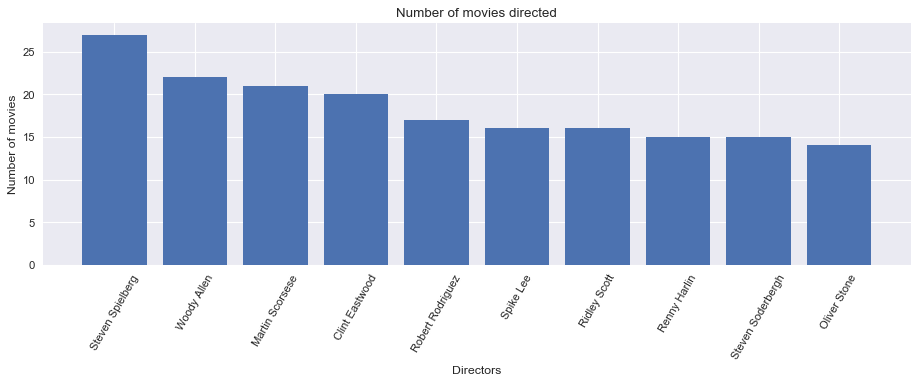

In [43]:

directors = []
for title in tmdb_5000_movies.keys():
     for member in tmdb_5000_credits[title]['crew']:
            # get both the name and the id to ensure that we have the correct director
            if member['job'] == 'Director':
                directors.append((member['name'], member['id']))
            
# count the directors
directors_count = Counter(directors)

# get the 10 directors that direct most movies
top_ten_directors = directors_count.most_common(10)

directors_name = []
num_movies = [] # number of movies each director has worked in

for val in top_ten_directors:
    num_movies.append(val[1])
    directors_name.append(val[0][0])


plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(num_movies)), num_movies)
plt.xlabel('Directors')
plt.ylabel('Number of movies')
plt.title('Number of movies directed')
plt.xticks( range(len(directors_name)), directors_name, rotation=60 )
plt.show()

Here we see the 10 most common Directors. From the plot we can see that Steven Spielberg has directed most movies, or 27 to be exact. Olvier Stone has directed 14 movies, which leaves him in 10th place.

### Most common hairstylists

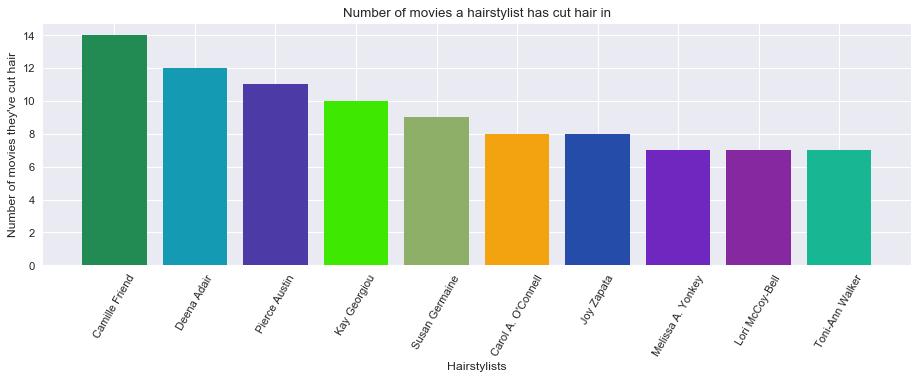

In [44]:
hairstylist = []
for title in tmdb_5000_movies.keys():
     for member in tmdb_5000_credits[title]['crew']:
            # get both the name and the id to ensure that we have the correct hair stylist
            if member['job'] == 'Hairstylist':
                hairstylist.append((member['name'], member['id']))
            
# count the actors
hairstylist_count = Counter(hairstylist)

# get the 10 hairstylist that style most stars
top_ten_hairstylist = hairstylist_count.most_common(10)

hairstylist_name = []
num_procedures = [] # number of movies each hairstylist has worked in

for val in top_ten_hairstylist:
    num_procedures.append(val[1])
    hairstylist_name.append(val[0][0])



# make cool colors for the hair dressers
colors = []
for i in range(len(num_procedures)):
    r = lambda: random.randint(0,255)
    colors.append('#%02X%02X%02X' % (r(),r(),r()))


plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(num_procedures)), num_procedures, color = colors)
plt.xlabel('Hairstylists')
plt.ylabel("Number of movies they've cut hair")
plt.title('Number of movies a hairstylist has cut hair in')
plt.xticks( range(len(hairstylist_name)), hairstylist_name, rotation=60 )
plt.show()


If you want to get a haircut like the movie stars, we recommend you to get in touch with Camille Friend, she has worked in most movies from our dataset. She has cut hair in at least 14 movies, so she is experienced.

### Most common visual effects supervisors

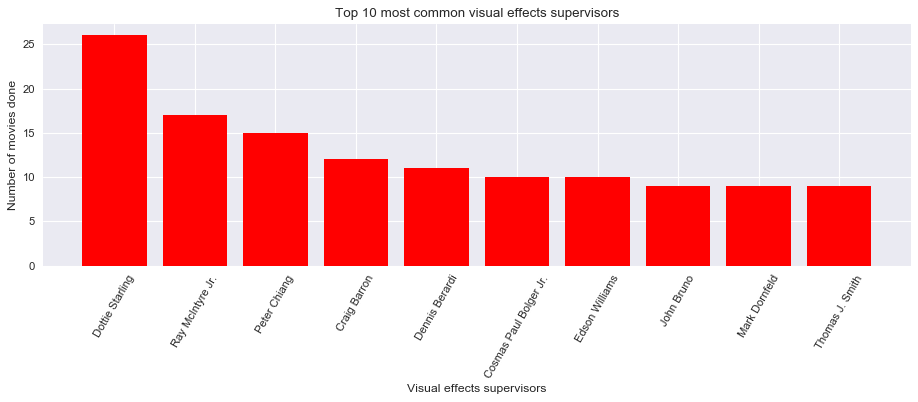

In [45]:
## Most common visual effects supervisor

visual_effects_supervisor = []
for title in tmdb_5000_movies.keys():
     for member in tmdb_5000_credits[title]['crew']:
            # get both the name and the id to ensure that we have the correct visual effects supervisor
            if member['job'] == 'Visual Effects Supervisor':
                visual_effects_supervisor.append((member['name'], member['id']))
            
# count the actors
visual_effects_supervisor_count = Counter(visual_effects_supervisor)

# get the 10 most common visual effects supervisor
top_ten_visual_effects_supervisor = visual_effects_supervisor_count.most_common(10)

visual_effects_supervisor_name = []
num_procedures = [] 

for val in top_ten_visual_effects_supervisor:
    num_procedures.append(val[1])
    visual_effects_supervisor_name.append(val[0][0])



plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(num_procedures)), num_procedures, color = 'red')
plt.xlabel('Visual effects supervisors')
plt.ylabel('Number of movies done')
plt.title('Top 10 most common visual effects supervisors')
plt.xticks( range(len(visual_effects_supervisor_name)), visual_effects_supervisor_name, rotation=60 )
plt.show()

When it commes to visual effects, Dottie Starling is your girl. She has done visual effects for many famous movies e.g, 'Titanic', '12 Years a Slave' and 'Pirates of the Caribbean' to name a few. So next time you are making a video, we recommend getting in touch with her. If you have not taken 'Social Data Analysis and Visualization' and are taking it next semaster, don't forget this!

### Original music composer

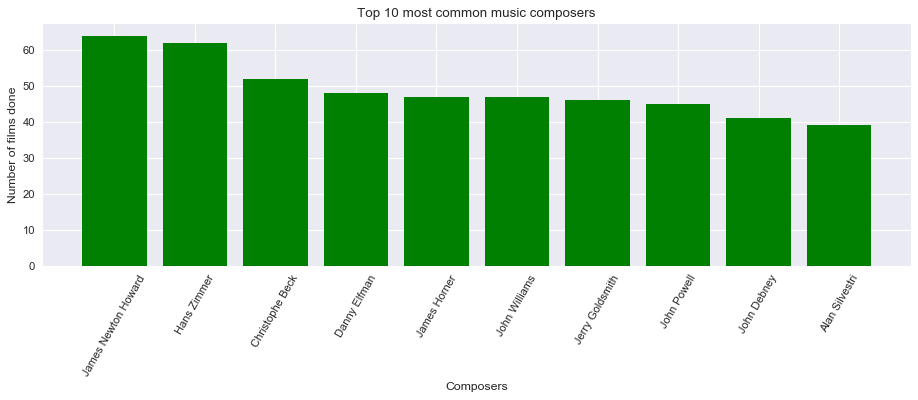

In [46]:
music_composers = []
for title in tmdb_5000_movies.keys():
     for member in tmdb_5000_credits[title]['crew']:
            # get both the name and the id to ensure that we have the correct composer
            if member['job'] == 'Original Music Composer':
                music_composers.append((member['name'], member['id']))
            
# count the composers
music_composers_count = Counter(music_composers)

# get the 10 compseres that compose the most music
top_ten_music_composers = music_composers_count.most_common(10)

music_composers_name = []
num_procedures = [] 

for val in top_ten_music_composers:
    num_procedures.append(val[1])
    music_composers_name.append(val[0][0])



plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(num_procedures)), num_procedures, color = 'green')
plt.xlabel('Composers')
plt.ylabel('Number of films done')
plt.title('Top 10 most common music composers')
plt.xticks( range(len(music_composers_name)), music_composers_name, rotation=60 )
plt.show()



Here we see the composers who have created music for most movies. We can recommend using their music as study music, it really helps with focusing. We especially recommend Hans Zimmer, he really gets you in the mood for studying. However, James Newton Howard has composed music for more movies, making him likely to have produced some very good music, and as a bonus his name is Newton so he must be brilliant!

## Similarity measures

### Get data

In [48]:
filepath_storyline = r"imdb-storyline3.json"
with open(filepath_storyline) as json_data:
    d = json.load(json_data)

### Find similarities between storylines

In [49]:
# initalize the data
files = []
movie_number = {}
no_similarity_data = []
index = 0
for movie in tmdb_5000_movies.keys():
    
    _id = tmdb_5000_movies[movie]['id']
 
    if d[_id] != 0 and d[_id] != None:
        files.append(d[_id])
        movie_number[movie] = index
        index += 1
    else:
        # if a mmovie dose not have a storyline we throw it
        no_similarity_data.append(movie)
        
    

# Note that we excluded the stop words from the data because we did not consider it to be relevant
vectorizer = TfidfVectorizer(input = 'content', analyzer='word', min_df = 0, stop_words = 'english')
TF_IDF_matrix = vectorizer.fit_transform(files).todense()

In [50]:
# find the similarity between all movies
movies = [movie for movie in tmdb_5000_movies.keys() if movie not in no_similarity_data]
similarities = []
for i in range(len(movies)):
    for j in range(i + 1, len(movies)):
        # calulate the similarity
        similarity = 1 - spatial.distance.cosine(TF_IDF_matrix[movie_number[movies[i]]], TF_IDF_matrix[movie_number[movies[j]]])
        similarities.append(similarity)

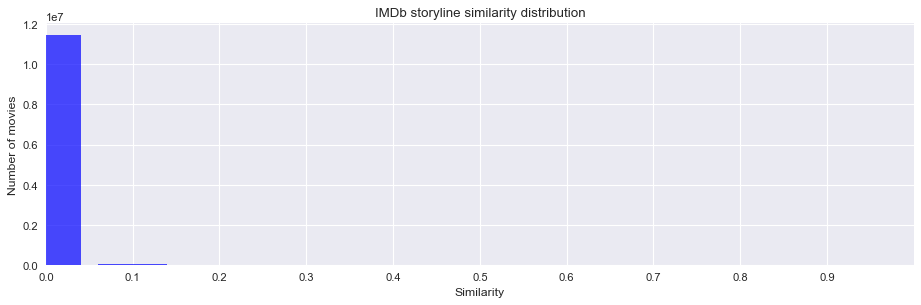

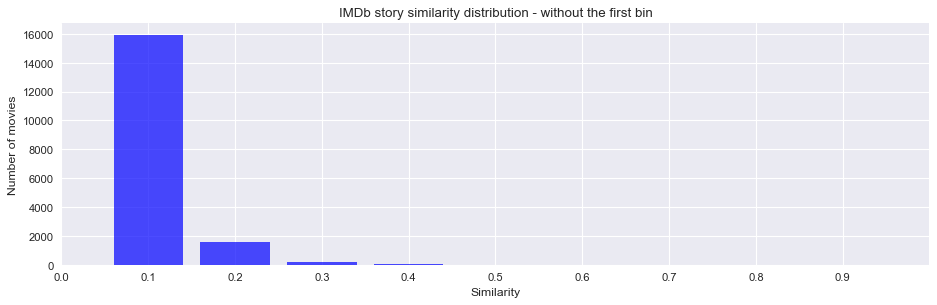

In [53]:
siml = []
for similarity in similarities:
    siml.append(math.floor(similarity * 10))

hist_values = Counter(siml) 
xlabel = []
ylabel = []

for key, value in sorted(hist_values.items()):
    xlabel.append(key)
    ylabel.append(value)
    


plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xlabel, ylabel, color = 'blue', alpha = 0.7)
plt.xlabel('Similarity')
plt.ylabel('Number of movies')
plt.title('IMDb storyline similarity distribution')
plt.xlim(0,10)
plt.xticks(range(10), [i/10.0 for i in range(10)])
plt.show()

plt.figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(xlabel[1:], ylabel[1:], color = 'blue', alpha = 0.7)
plt.xlabel('Similarity')
plt.ylabel('Number of movies')
plt.title('IMDb story similarity distribution - without the first bin')
plt.xlim(0,10)
plt.xticks(range(10), [i/10.0 for i in range(10)])
plt.show() 


Looking at the distributions we see that most movies do not have similar storylines. This makes sesns since most of them do not include the same unique words, and therefore are said to be unsimilar. However, in the second plot we exclude the ones who have really small similarity. There it can be seen that there are some movies that are considered relatively similar. Altough the similarity range is between 0 and 1 we can see that the range of the IMDb storyline similarity ranges between 0.0 and 0.5.